# Imports

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# Overview: Recommendation Systems

A recommendation engine is a machine learning algorithm that ranks or rates products based on certain criteria. As a general definition, a recommender system is a system that predicts the rating a user will give an item. The predictions are then ranked and returned to the user.

Recommender systems fall into three main categories:
- Content-based filtering uses similarities in the features of products, services, and content to make recommendations
- Collaborative filtering uses similar users' preferences to provide recommendations to a particular user
- Hybrid recommender systems combine multiple recommender strategies to make recommendations, using the advantages of each in different ways

# 19.1 Introduction

# 19.2 Conceptual Framing

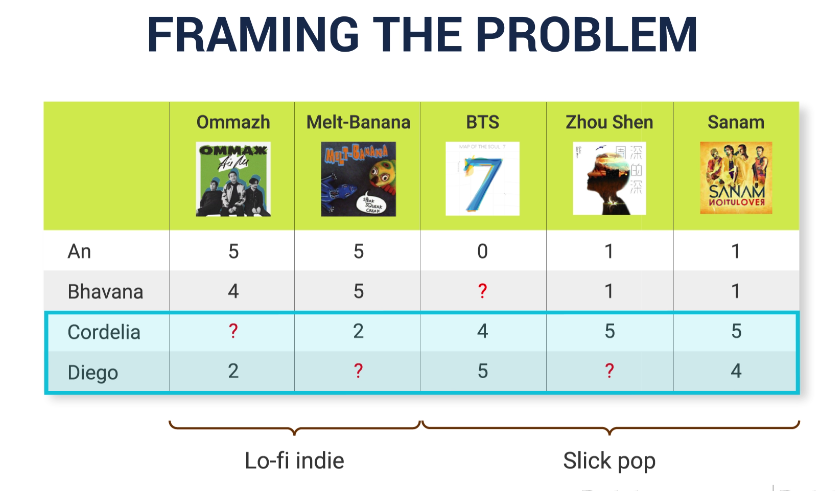

# Overview - Content Based Filtering

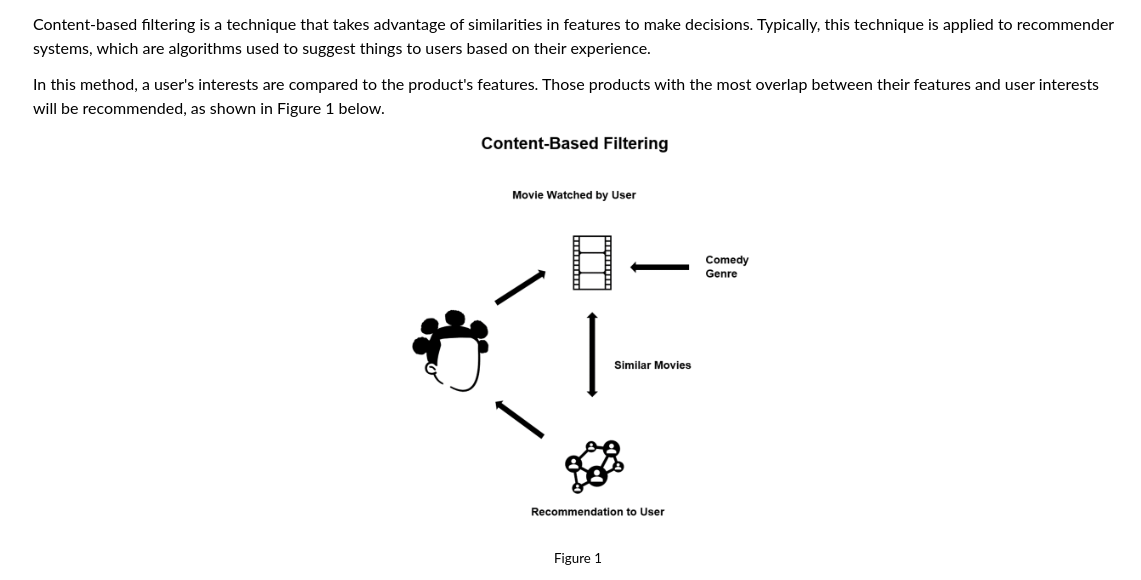

# 19.3 Content-Based Filtering

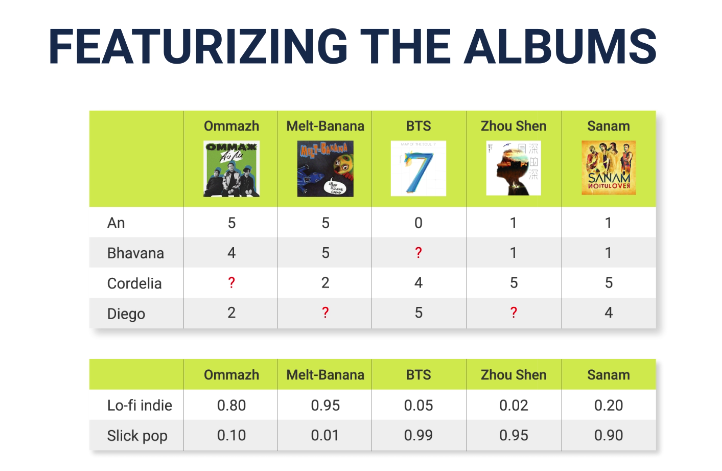

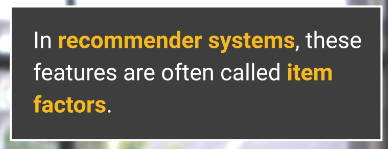

Now you can collect the item factors in a data frame and fit with linear regression
- The resulting linear regression parameters (coefficients of the model) are called user factors
- A prediction is then the dot product of the item factors and the user factors, plus the bias term

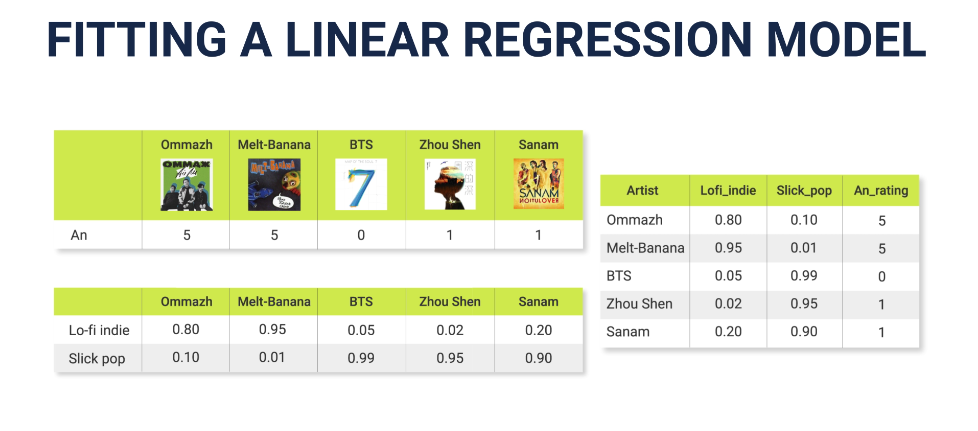

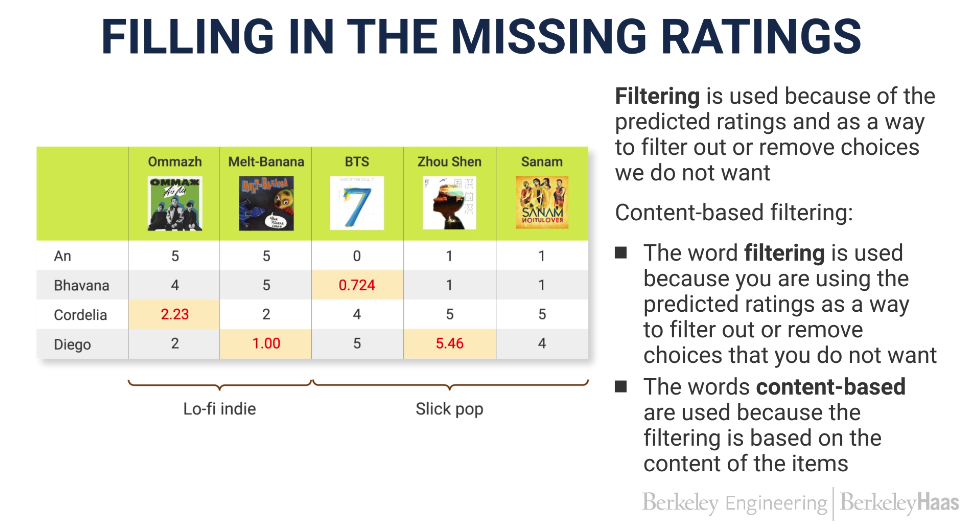

Professor Hug closes by saying that this approach is difficult in the real world because before fitting and operating such a model,
- You would have to decide a priori what all the categories should be (lo fi, slick pop, etc...)
- And then you would have to rate them